In [1]:
%matplotlib inline

In [2]:
from IPython.display import YouTubeVideo, Image
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import sqlite3

# Problem Set 2

Please review the  Syllabus for the standards of "A" and "B" work.

## Directions

1. Show all work/steps/calculations. 
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results. Explain your decisions.**
4. Please leave all the top level Markdown headers in place.

**Submission**

For this assignment...

0. Complete the pre-submission checklist at the end of the notebook.
1. create a directory whose name is your JHED ID (not your student id, basically your email username): `ssmith1`
2. Place all files in that directory:
    1. the .ipynb version of the notebook, named using your JHED ID only, like `ssmith1.ipynb`
    2. the database, `contracts.db`
    3. the DDL file, `contracts.sql`
    3. your ETL code as `contracts.py`
    4. the CSV/Excel file that you used.
    5. **nothing else should be in the directory**.
3. zip using Zip compression to create a file: `ssmith1.zip`
4. Upload to Canvas

Do not add anything to the names like " Problem Set 2".
Any assignment not following the submission guidelines will generally be assumed to be incomplete under the Syllabus and therefore a "C".


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>This Problem Set covers Labs 3 and 4 (and the corresponding course materials).</p>
</div>

---



## Section 1 - Visualization

Based on the visualization principles presented in the Visualization Module, answer the following questions for each chart:

1. What the messages/stories of the chart? Identify at least two.
2. What are the main problems with the chart? Be specific, referring to concepts (not rules) in the Visualization module ("we're not supposed to use pie charts" is not a concept).
3. Create one chart/table for each of the two messages. Explain your visualization decisions and why your chart follows the concepts and methods presented in the Visualization module. Be specific.

### Chart 1
![chart1](http://www.essexrecordofficeblog.co.uk/wp-content/uploads/2015/01/Death-pie-chart.jpg)

### Question 1.1 

In terms of the Eight Quantitative Relationships, the first message of this chart that I see is a Part/Whole relationship, as we can look at the percentage of deaths in one age bracket compared to the total. Another relationship could be Ranking relationship, where age ranges are divided into bins of 10 years, and we can rank each age range based on how large each portion of this chart is; for example, the age range 0-9 has the largest percentage of deaths in Hatfield Broad Oak between these years by a large margin, most likely due to the high rate of infant mortality during this time period.

### Question 1.2

According to William Cleveland's research, angles are more difficult to decode than something like length, so pie charts in general are not a great tool for making an easy to read chart versus something like a bar chart. We also have the use of color here, which has no meaningful value in this chart - why is 20-29 red and why is 50-59 blue? Based on Colin Ware's _Attributes of Form_. Finally, what does it mean that the 90-99 age group has a value of -1% ? Births maybe? Clearly we shouldn't have a negative percentage when looking at these relationships, and in fact adding all of the other age groups, we come out to a total of 100%. So why is the 90-99 group even included here?

### Question 1.3

Let's start with the Part/Whole relationship. We can use a vertical bar chart to look at each age bracket and see how large each bar is, with a y-axis scale of 0 to 1.

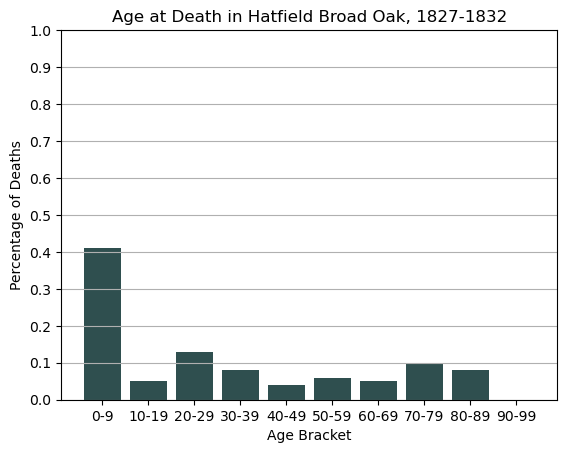

In [3]:
age_groups = ['0-9', '10-19', '20-29', '30-39', '40-49',
                '50-59', '60-69', '70-79', '80-89', '90-99']
death_percents = [0.41, 0.05, 0.13, 0.08, 0.04, 0.06, 0.05, 0.10, 0.08, -0.01]

plt.bar(age_groups, death_percents, color='darkslategray')
plt.xlabel('Age Bracket')
plt.ylabel('Percentage of Deaths')

plt.ylim(0, 1)
plt.yticks(ticks=np.arange(0, 1.1, 0.1))

plt.grid(axis='y')
plt.title('Age at Death in Hatfield Broad Oak, 1827-1832')


plt.show()

This chart does a better job at conveying the information. It is devoid of meaningless color which means we can focus on the height of the bars, not the color. It is easier to compare length between age groups. We can see that the 20-29 age bracket is roughly twice the height of the 50-59 age bracket, for example. The vertical bar chart here is a good replacement for the pie chart since it still shows values as a percentage (in this case between 0 and 1). Of course, we don't see the 90-99 value here, since this chart only goes from 0 to 1.

Next we can focus on the Ranking relationship. There will be two vertical bar charts here, one to show the bars in order of increasing age bracket, and the other to show which age brackets present the highest rate of deaths, in descending order.

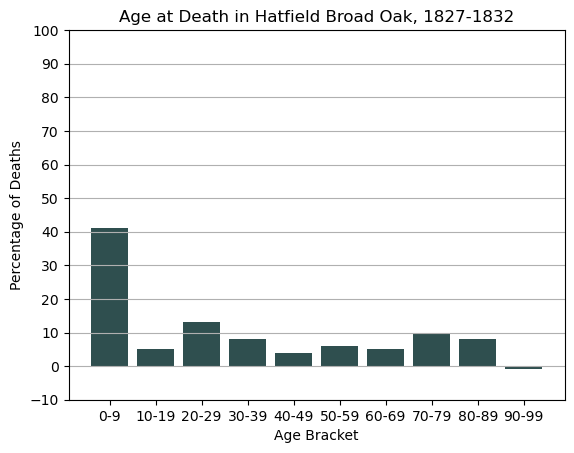

In [4]:
age_groups = ['0-9', '10-19', '20-29', '30-39', '40-49',
                '50-59', '60-69', '70-79', '80-89', '90-99']
death_percents = [41, 5, 13, 8, 4, 6, 5, 10, 8, -1]

plt.bar(age_groups, death_percents, color='darkslategray')
plt.xlabel('Age Bracket')
plt.ylabel('Percentage of Deaths')
plt.yticks(ticks=np.arange(-10, 110, 10))
plt.grid(axis='y')
plt.title('Age at Death in Hatfield Broad Oak, 1827-1832')


plt.show()

Note I deliberately did not change the scaling too much for the y-axis here, just to be able to show the 90-99 age bracket value, but recognize that in general we should always start bar charts from zero. That aside, we can see this looks very similar to the part/whole chart made above, just with the different scaling.

Now let's try plotting in descending order so we can compare age groups by their next highest counterpart.

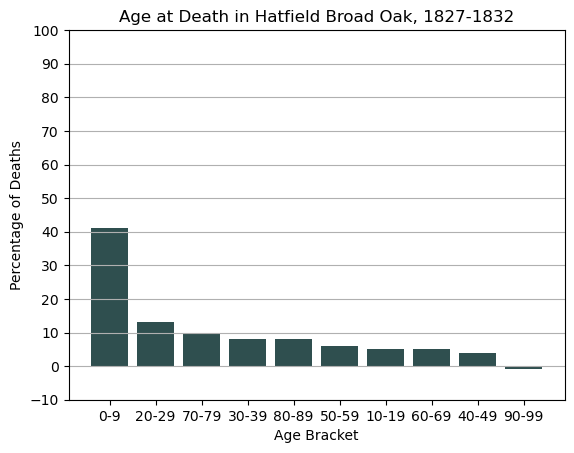

In [5]:
age_groups = ['0-9', '20-29', '70-79', '30-39', '80-89',
                '50-59', '10-19', '60-69', '40-49', '90-99']
death_percents = [41, 13, 10, 8, 8, 6, 5, 5, 4, -1]

plt.bar(age_groups, death_percents, color='darkslategray')
plt.xlabel('Age Bracket')
plt.ylabel('Percentage of Deaths')
plt.yticks(ticks=np.arange(-10, 110, 10))
plt.grid(axis='y')
plt.title('Age at Death in Hatfield Broad Oak, 1827-1832')

plt.show()

Again the 90-99 age bracket is weird with a value of -1%, but it was difficult to find the reasoning why this data point was observed. It is included here for completion. Again, we left color out of the charts here, and we have well defined axes with a descriptive title. It is easy to compare age groups like 30-39 and 80-89, having about the same proportion of deaths, similarly 10-19 and 60-69 age brackets can be compared this way as well. It is again interesting to note that since infant mortality rate was very high during this era, there is a huge amount of deaths accounted for in the 0-9 age bracket, while when we compare other age groups, we see less of a notable difference.

---

### Chart 2

![chart2](http://skepchick.org/wp-content/uploads/2015/06/CNN-weed-chart.jpg)

### Question 2.1

The first message I see here is again a Part/Whole relationship, since we are looking at demographics of people who have tried weed among certain age groups. This can also loosely be interpreted as a pie chart. The second message or story I see can again be Ranking - we can directly compare which age group has a larger or smaller percentage of people who have tried weed.

### Question 2.2

I think the use of color here is better done than the chart in part 1, however it is not entirely necessary either. Again the main problem is that angles are difficult to decode. In this chart specifically, it does not look like the angles accurately correspond to the percentage - 17% for the 65+ age group looks too similar to the 49% for the 30-49 age group. Finally, and while I don't think this covers a specific principle mentioned in _Fundamentals_, why are the age brackets different sizes? How were they chosen? These groupings are just very inconsistent and don't follow any logical reasoning.

### Question 2.3

Let's create a vertical bar chart for this data.

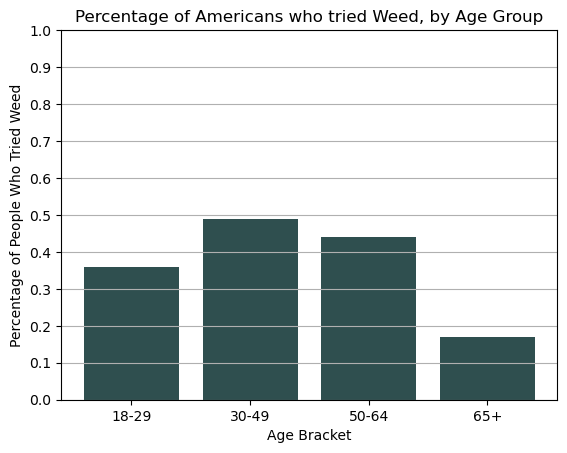

In [6]:
age_groups = ['18-29', '30-49', '50-64', '65+']
weed_percents = [0.36, 0.49, 0.44, 0.17]

plt.bar(age_groups, weed_percents, color='darkslategray')
plt.xlabel('Age Bracket')
plt.ylabel('Percentage of People Who Tried Weed')
plt.yticks(ticks=np.arange(0, 1.1, 0.1))
plt.grid(axis='y')
plt.title('Percentage of Americans who tried Weed, by Age Group')


plt.show()

This chart has clear grid lines, making it easy to distinguish each value per age group. Again, we don't have any unneccessary color, and we have clear axes and a title that describes what we are looking at.

Next we can look at the ranking relationship. Again there will be two vertical bar charts, one for the data by increasing age group (as one would expect), and one sorted by descending order.

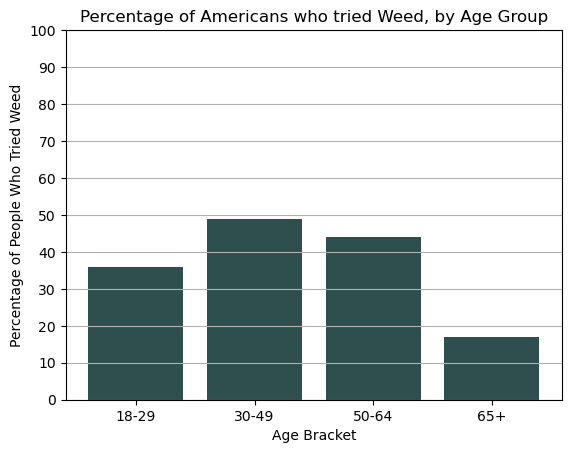

In [7]:
age_groups = ['18-29', '30-49', '50-64', '65+']
weed_percents = [36, 49, 44, 17]

plt.bar(age_groups, weed_percents, color='darkslategray')
plt.xlabel('Age Bracket')
plt.ylabel('Percentage of People Who Tried Weed')
plt.yticks(ticks=np.arange(0, 110, 10))
plt.grid(axis='y')
plt.title('Percentage of Americans who tried Weed, by Age Group')


plt.show()

Again very similar to the part/whole chart created above. The more interesting chart come from sorting.

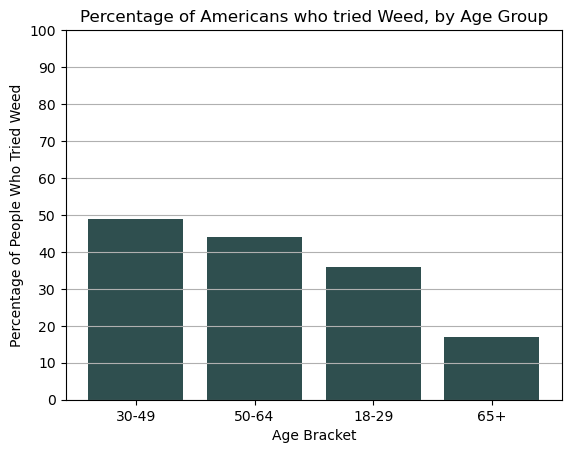

In [8]:
age_groups = ['30-49', '50-64', '18-29', '65+']
weed_percents = [49, 44, 36, 17]

plt.bar(age_groups, weed_percents, color='darkslategray')
plt.xlabel('Age Bracket')
plt.ylabel('Percentage of People Who Tried Weed')
plt.yticks(ticks=np.arange(0, 110, 10))
plt.grid(axis='y')
plt.title('Percentage of Americans who tried Weed, by Age Group')


plt.show()

This chart makes it very easy to compare age groups. We can see that about half the people polled in the 30-49 age bracket have tried weed, while the 65+ age group does not have a large demographic of Americans who have tried weed. This chart makes it clear how each age group compares to one another as we can directly compare the heights of the bar charts.

---

## Section 2 - ETL and Querying an RDBMS

In Lab 4, we obtained data from a JSON document. This time we're going to start with a Wikipedia page but obtain and transform the supporting data in an Excel file.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>You may not use the Pandas library for this assignment. You should use "raw" SQL statements and regular Python data structures. You will not always have Pandas available to you.</p>
    <p>Scientific notation is not acceptable in a business setting. Find out how to fix the formatting in Python.</p>
</div>


**DIRECTIONS:**

1. View [Top 100 Contractors of the U.S. federal government](https://en.wikipedia.org/wiki/Top_100_Contractors_of_the_U.S._federal_government).
2. Scroll down to the footnotes. If you follow footnote 7, you can obtain the raw data for FY2015 which is an Excel file. 

    The Excel file is divided into tabs. The first tab covers all the Federal government while the remaining tabs cover departments and sub-departments. **We are only interested in departments** which means we don't want spending from the first tab (although you may want the contractor information) and we don't want sub-departments. 
    
    A department will have a code that ends with "00". For example, "9700" is the Defense Department but "9761" is "Defense Threat Reduction". We're not interested in the latter.

3. Create a SQLite3 database, `contracts.db`, of the department specific actions (contracts) and dollar amounts. It should have **two** tables. The first, `contractors`, should have an id (as a primary key) and a global_vendor_name (as a varchar). The second, `actions`, should include an id (primary key), department, actions (number of actions), dollars (dollars obligated) and contractor_id as a foreign key to the contractors table. Follow the same pattern as in the Lab. All your database and table creation (DDL) commands will be in `contracts.sql`.

4. Reading the Excel file and creating the database should be automated with no cutting and pasting so that you could regenerate the database for a corrected file or for FY2016 (assuming it had the same format). Both `xlrd` and `openpyxl` are included in Anaconda. (Translating the file from .xls to .xlsx *is* permitted but may not be required). Place this "ETL" code in a separate `contracts.py` file and include it with your submission.

At this point, you should have:

1. `contracts.sql` will create the data schema.
2. `contracts.py` will fill the database tables with the correct data from the Excel spreadsheet.
3. `contracts.db` will have the data in it.

For this ETL part, we will grade you based on the correctness of your solution (did you put the right things in the right files, etc.) and the integrity of the database (are the tables correct, with the correct number of rows, etc.).

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p><strong>None</strong> of your ETL should appear in this notebook. It will be in the files above.</p>
</div>

For the following questions, you should connect to `contracts.db`, using the sqlite3 library (**without** using Pandas) and provide answers to the following questions, nice formatted (you may use the `tabulate`, if you like). Remember the formula: discuss/code/discuss, after you get a query result, you should discuss anything salient in the result. Make whatever additional markdown/code cells you might need but do not delete anything already here.

### Question 3.1

What are the total actions and dollars obligated by department?



In [9]:
connection = sqlite3.connect('./contracts.db')

In [10]:
query = """
SELECT 
    department,
    SUM(actions),
    CAST(SUM(dollars) AS INTEGER)
FROM actions
GROUP BY department
"""
result1 = list(connection.execute(query))
tabulate(result1, headers=["Department", "Number of Actions", "Dollars Obligated ($)"], tablefmt='html')

Department,Number of Actions,Dollars Obligated ($)
(GSA) 4700,47825,5961147392
Agriculture (1200),9621,3652093712
Air Force (5700),42409,42187753810
Army (2100),43827,44910442468
Commerce (1300),5857,2115698218
DoD (9700),7139909,175185649682
EPA (6800),9115,1128402445
Education (9100),1844,2567375881
Energy (8900),4335,23947016200
Federal,7588245,238543984023


Here we can see which departments have the biggest actions and spending. I suppose it makes sense that Federal, DoD, and Navy are the departments with the most dollars obligated to them, since they provide national security, and national oversight among other tasks. We can also sort by dollars obligated to get a better idea.

In [11]:
query = """
SELECT 
    department,
    SUM(actions),
    CAST(SUM(dollars) AS INTEGER) as obs
FROM actions
GROUP BY department
ORDER BY obs DESC
"""
result1 = list(connection.execute(query))
tabulate(result1, headers=["Department", "Number of Actions", "Dollars Obligated ($)"], tablefmt='html')

Department,Number of Actions,Dollars Obligated ($)
Federal,7588245,238543984023
DoD (9700),7139909,175185649682
Navy (1700),71527,64776602305
Army (2100),43827,44910442468
Air Force (5700),42409,42187753810
Energy (8900),4335,23947016200
NASA (8000),15509,14984004172
Health & Human Services (7500),14107,14948088333
Veterans Affairs (3600),3234826,13107685943
Homeland Security (7000),13383,8907804416


So we can see at the bottom we have EPA, Housing and Urban Development, and Labor departments, which depending on who you ask, might be a good thing or a bad thing. We note even though some departments like Veterans Affairs are towards the middle in terms of dollars, the number of actions they might have could be larger or smaller. Again, we see Navy, Army, and Air Force rise to the top here, as we know the U.S. invests heavily in the military.

### Question 3.2

What is Johns Hopkins' number of actions and dollars by department (remember Johns Hopkins is not just the university)? 

In [12]:
query = """
SELECT
    global_vendor_name,
    department,
    SUM(actions),
    CAST(SUM(dollars) AS INTEGER) as obs
FROM actions 
JOIN contractors ON actions.contractor_id = contractors.id
WHERE global_vendor_name LIKE '%Johns Hopkins%'
GROUP BY department
"""
result1 = list(connection.execute(query))
tabulate(result1, headers=["Department", "Number of Actions", "Dollars Obligated ($)"], tablefmt='html')

,Department,Number of Actions,Dollars Obligated ($)
JOHNS HOPKINS UNIVERSITY,DoD (9700),1549,1082523695
JOHNS HOPKINS UNIVERSITY,Federal,2339,1768684609
JOHNS HOPKINS UNIVERSITY,Health & Human Services (7500),238,38968009
JOHNS HOPKINS UNIVERSITY,NASA (8000),425,214047526
JOHNS HOPKINS UNIVERSITY,Navy (1700),959,549499826


Here we can see the departments where John Hopkins has been giving some actions and dollars. It appears that Johns Hopkins medicine has a history of serving military families, which would make sense why we see these departments come up for this query. Doubly so thaht Health & Human Services comes up here as well. It also looks like NASA and Johns Hopkins have partnered up in the past, which makes sense given the research heavy nature of the university.

### Question 3.3

Determine how many vendors received contracts from 1 department, 2 departments, etc. In other words, I want a table that looks like the following (numbers are absolutely made up):

| # Departments | Vendors |
|-------------|-----------|
| 1           | 1238      |
| 2           | 525       |
| 3           | 275       |
| ...         |           |
| n           | 2         |

Interpret the first two rows in words. What is the overall story? Now, using *percentages* (instead of these raw counts), make a chart that shows this story using the principles explored in class.

In [13]:
query = """
SELECT 
    _counts, 
    count(names) 
FROM (
SELECT
    COUNT(*) AS _counts,
    global_vendor_name AS names
FROM actions
JOIN contractors ON actions.contractor_id = contractors.id
GROUP BY global_vendor_name
)
GROUP BY _counts
"""
result1 = list(connection.execute(query))

tabulate(result1, headers=["# Departments", "Vendors"], tablefmt='html')

# Departments,Vendors
1,1102
2,130
3,51
4,20
5,15
6,16
7,7
8,9
9,6
10,2


The first row shows us that there were 1102 contractors who received a contract from a single department. The second row shows that there were 130 contractors who received contracts from 2 departments. The overall story is that most contractors only receive 1, maybe 2 contracts if they're lucky. More than 2 contracts would be exceedingly rare.

Let's look at a vertical bar chart. First I will create two lists corresponding to the two columns we have, and then normalize the data in the second column.

In [14]:
num_depts = []
num_vendors = []
for row in result1:
    num_depts.append(row[0])
    num_vendors.append(row[1])
num_vendors = [x / sum(num_vendors) for x in num_vendors]

Now our data is ready to be charted.

Text(0.5, 1.0, 'Proportion of Vendors who Receive Government Contracts')

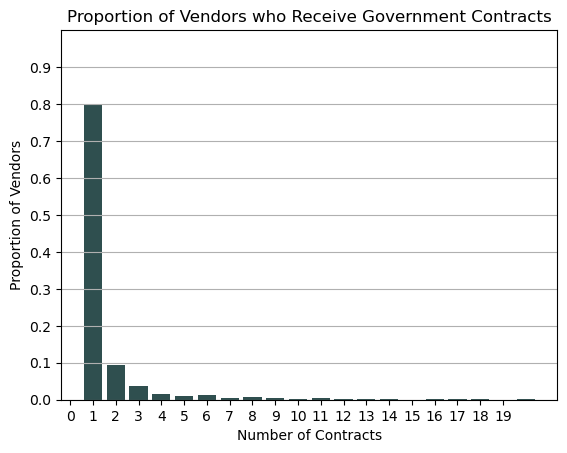

In [15]:

plt.bar(num_depts, num_vendors, color='darkslategray')
plt.xlabel('Number of Contracts')
plt.ylabel('Proportion of Vendors')
plt.ylim((0, 1))
plt.xticks(ticks=np.arange(0,20,1))
plt.yticks(ticks=np.arange(0,1.0,0.1))
plt.grid(axis='y')
plt.title('Proportion of Vendors who Receive Government Contracts')

We can see here again that about 80% of contractors only receive one contract, while about 10% receive 2. We see a right skewed distribution, as the proportions keep steadily decreasing from there, with a few spikes like at 8 and 11 contracts. I think this follows closely to the visualization principles outlined in class, as we have clearly defined labels, scales, no meaningless color, descriptive title, and gridlines along the y-axis for easier decoding.

### Question 3.4

Based on your experience working with the data, pick a question you would like to answer. Pose the question (in words, ie, "discuss"), write and execute the query to answer it (code) and discuss the result (in words, ie, "discuss").

Create as many Markdown/Code cells as you need to answer the question.

Well I don't have a ton of experience working with data; I'm a scientist by day, so while I do perform some basic data analysis, most of the 'hard' stuff is done with software I don't have the pleasure of working with. In relation to this database, I will pose a question: Which companies receive the most dollars obligated from the government, and how many contracts do they each have? Maybe we can look at just the top 5.

In [16]:
query = """
SELECT
    global_vendor_name,
    COUNT(*),
    CAST(SUM(dollars) AS INTEGER) as obs
FROM actions 
JOIN contractors ON actions.contractor_id = contractors.id
GROUP BY global_vendor_name
ORDER BY obs DESC
LIMIT 5
"""
result1 = list(connection.execute(query))
tabulate(result1, headers=["Companies", "Number of Contracts", "Dollars Obligated ($)"], tablefmt='html')

Companies,Number of Contracts,Dollars Obligated ($)
LOCKHEED MARTIN CORPORATION,20,99152732887
THE BOEING COMPANY,7,46071600554
GENERAL DYNAMICS CORPORATION,17,38628864008
RAYTHEON COMPANY,8,36657725535
NORTHROP GRUMMAN CORPORATION,13,29823112077


So here we see that Lockheed Martin has both the most number of contracts and the most dollars obligated out of any contractor. It's interesting that Boeing, despite only having 7 contracts, has the second most amount of dollars obligated. In the last part, we saw that there was one company with 18 contracts, let's look to see who it is:

In [17]:
query = """
SELECT
    global_vendor_name,
    COUNT(*) as _counts,
    CAST(SUM(dollars) AS INTEGER) as obs
FROM actions 
JOIN contractors ON actions.contractor_id = contractors.id
GROUP BY global_vendor_name
ORDER BY _counts DESC
LIMIT 2
"""
result1 = list(connection.execute(query))
tabulate(result1, headers=["Companies", "Number of Contracts", "Dollars Obligated ($)"], tablefmt='html')

Companies,Number of Contracts,Dollars Obligated ($)
LOCKHEED MARTIN CORPORATION,20,99152732887
BOOZ ALLEN HAMILTON HOLDING CORPORATION,18,8064792874


So we see it was Booz Allen Hamilton with the second most amount of contracts, but despite this, have fewer dollars obligated than the top 5 as we saw. It then follows we would have General Dynamics with 17 contracts and the 3rd most amount of dollars obligated, and so on. Again, it's clear that the companies we see with the most dollars and or contracts are ones that prioritize the national security, defense, and aerospace industries.

In [18]:
connection.close()

---

**PRE-SUBMISSION CHECK LIST**

Before you submit this assignent, go back and review the directions to ensure that you have followed each instruction.

* [ ] Have you completed every section and answered every question asked?
* [ ] For every question, have you described your approach and explained your results?
* [ ] Have you checked for spelling and grammar errors?
* [ ] Are your code blocks free of any errors?
* [ ] Have you deleted unused code or markdown blocks? Removed scratch calculations? Excessive raw data print outs?
* [ ] Hide all the code/output cells and make sure that you have sufficient discussion. Re-show the output cells but leave code cells hidden.
* [ ] Have you *SAVED* your notebook?
* [ ] Are you following the submission requirements for this particular assignment?
